# Prepare data

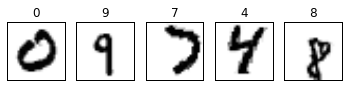

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, os, time

with open("../data/extended4_train.csv") as f:
    training_lines_all = [line for line in f]
    
training_lines = [np.array(line.split(","), dtype='float32') for line in training_lines_all[1:]]

training_images = []
training_labels = []
training_set = []
for line in training_lines:
    one_hot = np.zeros((10), dtype='float32')
    one_hot[int(line[0])] = 1.0
    training_labels.append(one_hot)
    training_images.append(np.array(line[1:], dtype='float32'))
    training_set.append((one_hot, line[1:]))
    
training_images = np.array(training_images)
training_labels = np.array(training_labels)
    
## See random 5 digit with their labels
random.shuffle(training_set)
fig = plt.figure()
for i, digit in enumerate(training_set[:5]):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(digit[0].nonzero()[0][0])  ## Label
    plt.imshow(digit[1].reshape((28, 28)), cmap=plt.cm.Greys)

# Preparing network

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.metrics import categorical_accuracy
from keras.regularizers import l1_l2, l1, l2

In [76]:
## Hyper-parameters
HIDDEN1 = 100
HIDDEN2 = 100
LR = 1e-3
REG = 0.001
DROP = 0.2
BATCH_SIZE = 200
EPOCH = 50
VALIDATION = 0.2
RESTORE = True

MODEL_PATH = "../model/MLP_keras/MLP_keras_hidden{}-{}".format(HIDDEN1, HIDDEN2)

In [84]:
model = Sequential()
model.add(Dense(HIDDEN1, input_dim=784, kernel_initializer='truncated_normal', activation='relu', \
         kernel_regularizer=l1_l2(REG),
         activity_regularizer=None))
model.add(Dense(HIDDEN2, kernel_initializer='truncated_normal', activation='relu', \
         kernel_regularizer=l1_l2(REG),
         activity_regularizer=None))
model.add(Dropout(DROP))
model.add(Dense(10, kernel_initializer='truncated_normal', activation='softmax', \
         kernel_regularizer=None,
         activity_regularizer=None))
sgd = SGD(lr=LR, momentum=0.9, decay=0.0, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, \
             metrics=[categorical_accuracy])

if RESTORE and os.path.isfile(MODEL_PATH):
    model.load_weights(MODEL_PATH)
    print("Model restored.")
model.fit(training_images, training_labels, epochs=EPOCH, batch_size=BATCH_SIZE, \
         validation_split=VALIDATION)
model.save_weights(MODEL_PATH)

Model restored.
Train on 134400 samples, validate on 33600 samples
Epoch 1/50
134400/134400 [==============================] - 4s - loss: 0.7475 - categorical_accuracy: 0.8878 - val_loss: 0.8439 - val_categorical_accuracy: 0.8533
Epoch 2/50
134400/134400 [==============================] - 3s - loss: 0.7289 - categorical_accuracy: 0.8841 - val_loss: 0.8297 - val_categorical_accuracy: 0.8519
Epoch 3/50
134400/134400 [==============================] - 3s - loss: 0.7235 - categorical_accuracy: 0.8824 - val_loss: 0.7984 - val_categorical_accuracy: 0.8593
Epoch 4/50
134400/134400 [==============================] - 3s - loss: 0.7191 - categorical_accuracy: 0.8809 - val_loss: 0.7963 - val_categorical_accuracy: 0.8618
Epoch 5/50
134400/134400 [==============================] - 5s - loss: 0.7227 - categorical_accuracy: 0.8800 - val_loss: 0.7941 - val_categorical_accuracy: 0.8588
Epoch 6/50
134400/134400 [==============================] - 5s - loss: 0.7191 - categorical_accuracy: 0.8791 - val_los

## Prepare test data

In [49]:
with open("../data/test.csv") as f:
	lines = [line for line in f]

test_images = [np.array(line.split(','), dtype='float32') for line in lines[1:]]
test_images = np.array(test_images)

# Predict test data

In [50]:
predictions = model.predict(test_images, batch_size=100)
predictions = np.array([np.argmax(i) for i in predictions])

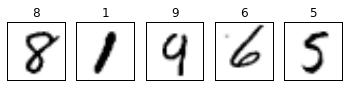

In [61]:
pred_set = zip(test_images, predictions)
## See random 5 digit
random.shuffle(pred_set)
fig = plt.figure()
for i, digit in enumerate(pred_set[:5]):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(digit[1])  ## Prediction
    plt.imshow(digit[0].reshape((28, 28)), cmap=plt.cm.Greys)

In [65]:
with open("../data/MLP_keras_submission.csv", "w") as sub:
    sub.write("ImageId,Label\n")
    for i in xrange(len(predictions)):
        sub.write(str(i + 1) + "," + str(predictions[i]) + "\n")